In [ ]:
# Import necessary libraries

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator

import seaborn as sb

import plotly.express as px

import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

In [ ]:
at_full = pd.read_csv("/content/application_train.csv")

In [ ]:
status_counts = pd.read_csv("/content/status_counts.csv")

# exploratory analysis

In [ ]:
at_columns = at_full.columns.to_list()
# at_columns

In [ ]:
list = ['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_EDUCATION_TYPE',

 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE'
 ]

In [ ]:
at = at_full[list]

In [ ]:
merged = at.merge(status_counts, on='SK_ID_CURR', how='left')

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   FLAG_OWN_CAR         307511 non-null  object 
 4   FLAG_OWN_REALTY      307511 non-null  object 
 5   CNT_CHILDREN         307511 non-null  int64  
 6   AMT_INCOME_TOTAL     307511 non-null  float64
 7   AMT_CREDIT           307511 non-null  float64
 8   AMT_ANNUITY          307499 non-null  float64
 9   AMT_GOODS_PRICE      307233 non-null  float64
 10  NAME_EDUCATION_TYPE  307511 non-null  object 
 11  NAME_TYPE_SUITE      306219 non-null  object 
 12  NAME_INCOME_TYPE     307511 non-null  object 
 13  NAME_FAMILY_STATUS   307511 non-null  object 
 14  NAME_HOUSING_TYPE    307511 non-null  object 
 15  Approved         

### NaN and outliers

In [ ]:
merged.isna().any()

SK_ID_CURR             False
TARGET                 False
NAME_CONTRACT_TYPE     False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
AMT_CREDIT             False
AMT_ANNUITY             True
AMT_GOODS_PRICE         True
NAME_EDUCATION_TYPE    False
NAME_TYPE_SUITE         True
NAME_INCOME_TYPE       False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
Approved                True
Refused                 True
dtype: bool

In [ ]:
merged[['AMT_ANNUITY', 'AMT_GOODS_PRICE']].describe()

,AMT_ANNUITY,AMT_GOODS_PRICE
count,307499.000000,3.072330e+05
mean,27108.573909,5.383962e+05
std,14493.737315,3.694465e+05
min,1615.500000,4.050000e+04
25%,16524.000000,2.385000e+05
50%,24903.000000,4.500000e+05
75%,34596.000000,6.795000e+05
max,258025.500000,4.050000e+06


In [ ]:
merged.sort_values(by='AMT_INCOME_TOTAL', ascending=False).head(7)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Approved,Refused
12840,114967,1,Cash loans,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Secondary / secondary special,Unaccompanied,Working,Married,House / apartment,2.0,0.0
203693,336147,0,Cash loans,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,Secondary / secondary special,Unaccompanied,Commercial associate,Married,House / apartment,3.0,0.0
246858,385674,0,Cash loans,Y,Y,0,13500000.0,1400503.5,130945.5,1368000.0,Higher education,Unaccompanied,Commercial associate,Married,House / apartment,5.0,0.0
77768,190160,0,Cash loans,Y,N,0,9000000.0,1431531.0,132601.5,1377000.0,Higher education,Unaccompanied,Working,Civil marriage,House / apartment,NaN,NaN
131127,252084,0,Cash loans,Y,N,0,6750000.0,790830.0,52978.5,675000.0,Higher education,Unaccompanied,Working,Married,House / apartment,3.0,1.0
103006,219563,0,Revolving loans,Y,Y,0,4500000.0,2250000.0,225000.0,2250000.0,Higher education,Unaccompanied,Working,Single / not married,House / apartment,NaN,NaN
204564,337151,0,Cash loans,N,N,0,4500000.0,450000.0,47749.5,450000.0,Higher education,Unaccompanied,Working,Single / not married,House / apartment,2.0,2.0


In [ ]:
income = merged['AMT_INCOME_TOTAL']

In [ ]:
income_1 = income[income <= 1_000_000]

In [ ]:
income_2 = income[income <= 200_000]

In [ ]:
income = income[income <= 400_000]

In [ ]:
# merged.loc[merged['AMT_INCOME_TOTAL'] > 5000000, 'AMT_INCOME_TOTAL'] = np.nan

In [ ]:
merged.iloc[[12840, 203693]]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,Approved,Refused
12840,114967,1,Cash loans,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Secondary / secondary special,Unaccompanied,Working,Married,House / apartment,2.0,0.0
203693,336147,0,Cash loans,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,Secondary / secondary special,Unaccompanied,Commercial associate,Married,House / apartment,3.0,0.0


In [ ]:
# # Plotting histograms for 'AMT_ANNUITY' and 'AMT_GOODS_PRICE'
# fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots with 2 plots side-by-side

# # Histogram for 'AMT_ANNUITY'
# ax[0].hist(merged['AMT_ANNUITY'], bins=20, color='b', alpha=0.7)
# ax[0].set_title('Histogram of AMT_ANNUITY')
# ax[0].set_xlabel('AMT_ANNUITY')
# ax[0].set_ylabel('Frequency')

# # Histogram for 'AMT_GOODS_PRICE'
# ax[1].hist(merged['AMT_GOODS_PRICE'], bins=20, color='g', alpha=0.7)
# ax[1].set_title('Histogram of AMT_GOODS_PRICE')
# ax[1].set_xlabel('AMT_GOODS_PRICE')
# ax[1].set_ylabel('Frequency')

# plt.tight_layout()  # Adjust subplots to fit into the figure area.
# plt.show()  # Display the plot

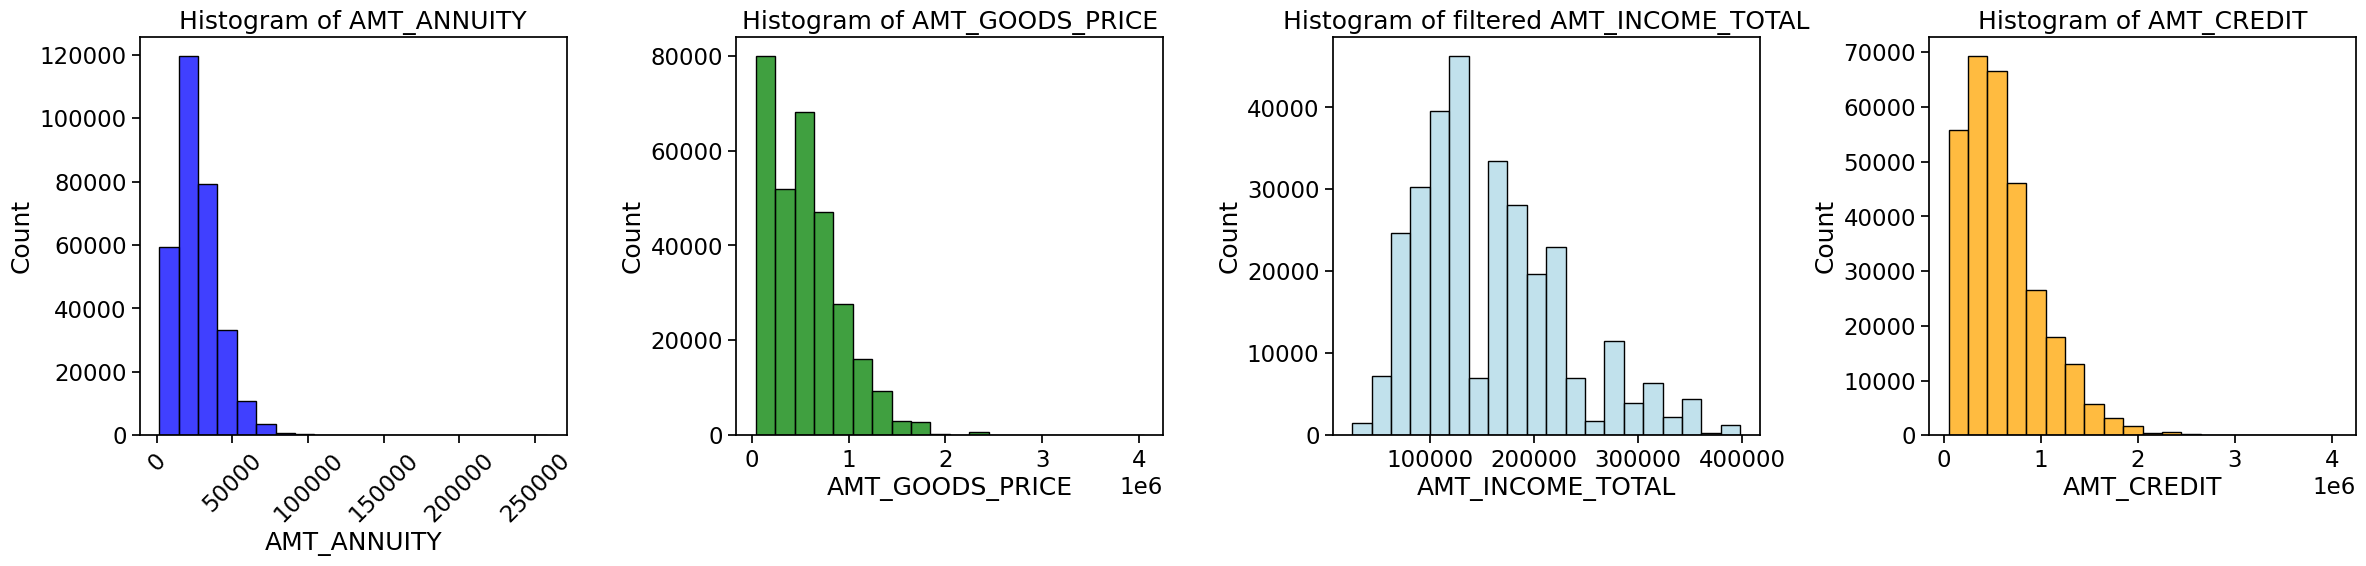

In [ ]:
# Increase font size for all text in plots
sb.set_context("notebook", font_scale=1.5) # "notebook" is a convenient preset. Increase 'font_scale' for larger text.

# Plot histograms for 'AMT_ANNUITY' and 'AMT_GOODS_PRICE'
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

# Histogram for 'AMT_ANNUITY'
sb.histplot(data=merged, x='AMT_ANNUITY', bins=20, color='b', ax=ax[0])
ax[0].set_title('Histogram of AMT_ANNUITY')

# Histogram for 'AMT_GOODS_PRICE'
sb.histplot(data=merged, x='AMT_GOODS_PRICE', bins=20, color='g', ax=ax[1])
ax[1].set_title('Histogram of AMT_GOODS_PRICE')

# Histogram for 'AMT_GOODS_PRICE'
sb.histplot(data=income, bins=20, color='lightblue', ax=ax[2])
ax[2].set_title('Histogram of filtered AMT_INCOME_TOTAL')

# Histogram for 'AMT_GOODS_PRICE'
sb.histplot(data=merged, x='AMT_CREDIT', bins=20, color='orange', ax=ax[3])
ax[3].set_title('Histogram of AMT_CREDIT')

# Rotate x-axis labels by 45 degrees
ax[0].tick_params(axis='x', rotation=45)  # Rotate labels on x-axis for the first subplot
# ax[1].tick_params(axis='x', rotation=45)  # Rotate labels on x-axis for the second subplot

plt.tight_layout()
plt.show()

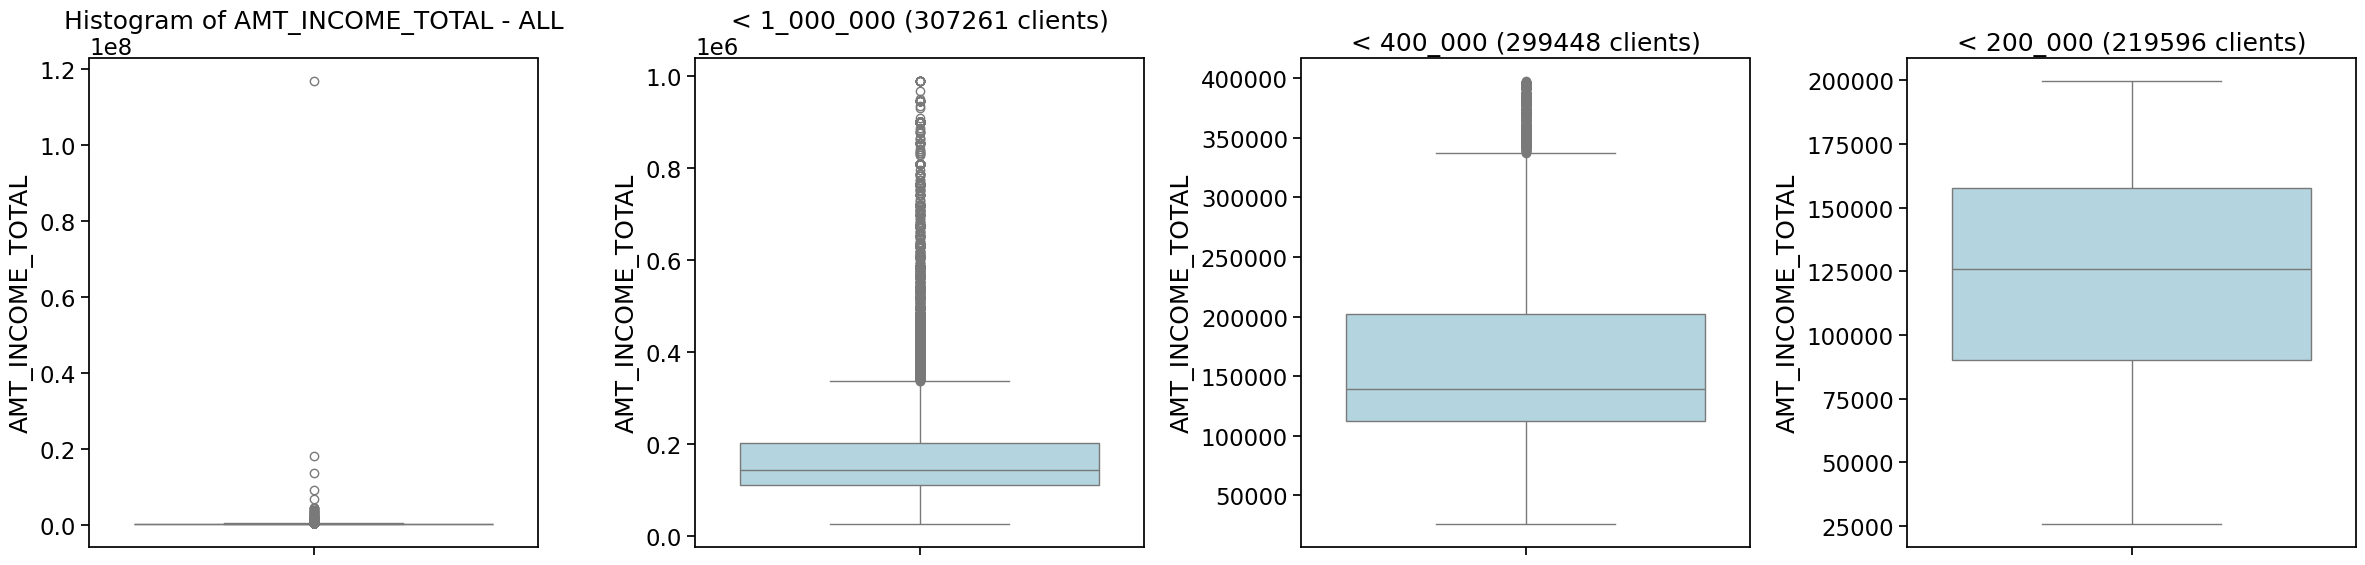

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

sb.boxplot(y='AMT_INCOME_TOTAL', data=merged, color='lightblue', ax=ax[0])  # Create the boxplot
ax[0].set_title('Histogram of AMT_INCOME_TOTAL - ALL')

sb.boxplot(data=income_1, color='lightblue', ax=ax[1])  # Create the boxplot
ax[1].set_title(f'< 1_000_000 ({income_1.shape[0]} clients)')

sb.boxplot(data=income, color='lightblue', ax=ax[2])  # Create the boxplot
ax[2].set_title(f'< 400_000 ({income.shape[0]} clients)')

sb.boxplot(data=income_2, color='lightblue', ax=ax[3])  # Create the boxplot
ax[3].set_title(f'< 200_000 ({income_2.shape[0]} clients)')

plt.tight_layout()
plt.show()  # Display the boxplot

In [ ]:
annuity_mean = merged['AMT_ANNUITY'].mean()
price_mean = merged['AMT_GOODS_PRICE'].mean()

In [ ]:
merged['AMT_ANNUITY'] = merged['AMT_ANNUITY'].fillna(annuity_mean)
merged['AMT_GOODS_PRICE'] = merged['AMT_GOODS_PRICE'].fillna(price_mean)

In [ ]:
merged['Approved'] = merged['Approved'].fillna(0)
merged['Refused'] = merged['Refused'].fillna(0)

In [ ]:
merged['NAME_TYPE_SUITE'] = merged['NAME_TYPE_SUITE'].fillna('Unknown')

In [ ]:
merged.isna().any()

SK_ID_CURR             False
TARGET                 False
NAME_CONTRACT_TYPE     False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
AMT_CREDIT             False
AMT_ANNUITY            False
AMT_GOODS_PRICE        False
NAME_EDUCATION_TYPE    False
NAME_TYPE_SUITE        False
NAME_INCOME_TYPE       False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
Approved               False
Refused                False
dtype: bool

### children

In [ ]:
merged['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [ ]:
merged.groupby('CNT_CHILDREN')['CNT_CHILDREN'].count()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
Name: CNT_CHILDREN, dtype: int64

In [ ]:
children = merged['CNT_CHILDREN'].sort_values(ascending=False)[10:]

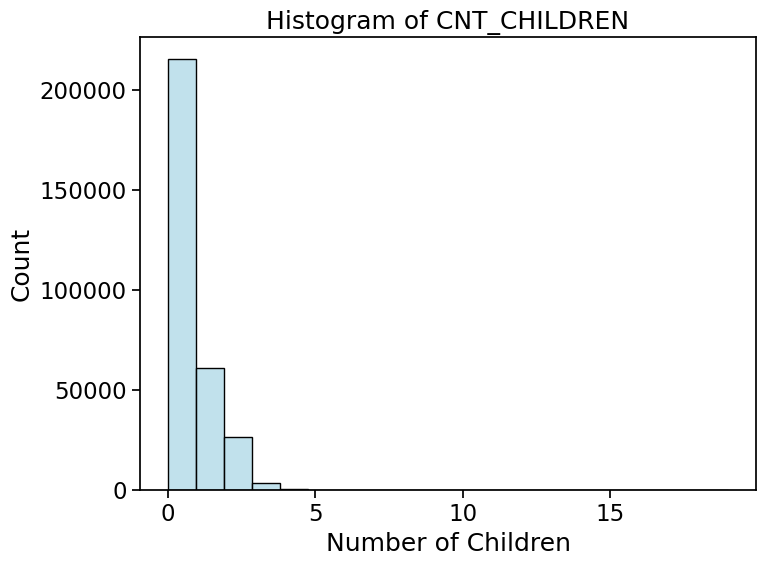

In [ ]:
# Create a histogram for 'CNT_CHILDREN'
plt.figure(figsize=(8, 6))
sb.histplot(data=merged, x='CNT_CHILDREN', bins=20, color='lightblue')

# Set plot titles and labels
plt.title("Histogram of CNT_CHILDREN")
plt.xlabel("Number of Children")
plt.ylabel("Count")

plt.tight_layout()  # Ensures proper layout of plot elements
plt.show()  # Display the histogram

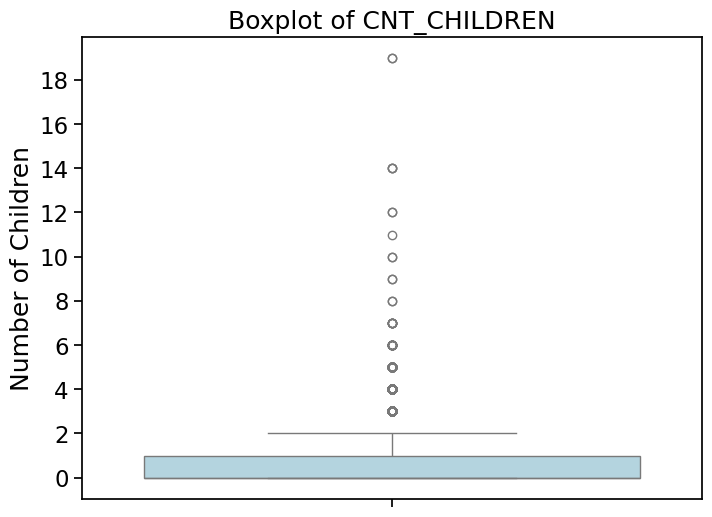

In [ ]:
# Set Seaborn context to adjust font size
sb.set_context("notebook", font_scale=1.5)  # Increase font scale

# Create a boxplot for the 'CNT_CHILDREN' column
plt.figure(figsize=(8, 6))  # Set the figure size
sb.boxplot(y='CNT_CHILDREN', data=merged, color='lightblue')  # Create the boxplot

# Set the y-axis to display only whole numbers
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure whole numbers on y-axis

# Set y-axis to increment by a specific value
plt.gca().yaxis.set_major_locator(MultipleLocator(2))  # Set y-axis ticks to increment by 2


# Set plot titles and labels
plt.title("Boxplot of CNT_CHILDREN")
plt.ylabel("Number of Children")

plt.show()  # Display the boxplot

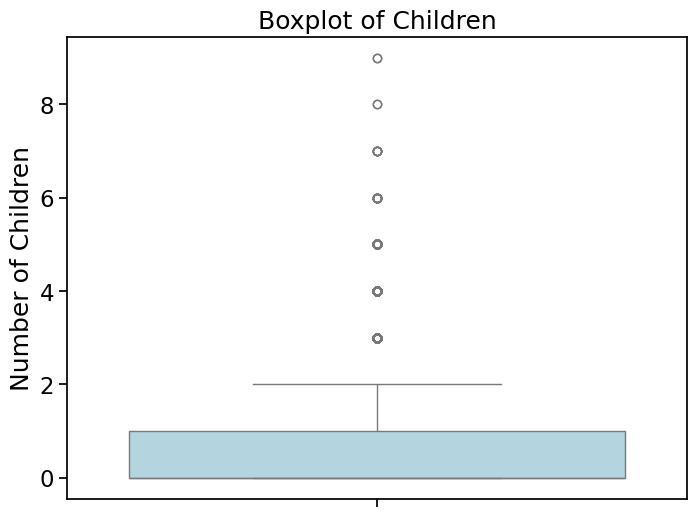

In [ ]:
# Set Seaborn context to adjust font size
sb.set_context("notebook", font_scale=1.5)  # Adjusts the overall font size

# Create a boxplot for the Series
plt.figure(figsize=(8, 6))  # Set the figure size
sb.boxplot(y=children, color='lightblue')  # Create a vertical boxplot

# Set plot titles and labels
plt.title("Boxplot of Children")
plt.ylabel("Number of Children")

plt.show()  # Display the boxplot

### převést z OBJECT na číselné hodnoty pomocí mapování - .map()

In [ ]:
merged.groupby('NAME_CONTRACT_TYPE')['NAME_CONTRACT_TYPE'].count()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [ ]:
merged.groupby('FLAG_OWN_CAR')['FLAG_OWN_CAR'].count()

FLAG_OWN_CAR
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [ ]:
merged.groupby('FLAG_OWN_REALTY')['FLAG_OWN_REALTY'].count()

FLAG_OWN_REALTY
N     94199
Y    213312
Name: FLAG_OWN_REALTY, dtype: int64

In [ ]:
merged.groupby('NAME_EDUCATION_TYPE')['NAME_EDUCATION_TYPE'].count()

NAME_EDUCATION_TYPE
Academic degree                     164
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Secondary / secondary special    218391
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
at.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values()

NAME_EDUCATION_TYPE
Lower secondary                  130079.358491
Secondary / secondary special    155158.512138
Incomplete higher                181563.812397
Higher education                 208652.053814
Academic degree                  240009.146341
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
mapping_NAME_CONTRACT_TYPE = {
    'Cash loans': 1,
    'Revolving loans': 0}

mapping_FLAG = {
    'Y': 1,
    'N': 0}

mapping_NAME_EDUCATION_TYPE = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4}

merged['NAME_CONTRACT_TYPE'] = merged['NAME_CONTRACT_TYPE'].map(mapping_NAME_CONTRACT_TYPE)
merged['FLAG_OWN_CAR'] = merged['FLAG_OWN_CAR'].map(mapping_FLAG)
merged['FLAG_OWN_REALTY'] = merged['FLAG_OWN_REALTY'].map(mapping_FLAG)
merged['NAME_EDUCATION_TYPE'] = merged['NAME_EDUCATION_TYPE'].map(mapping_NAME_EDUCATION_TYPE)

### převést z OBJECT na číselné hodnoty pomocí ordinal encoding

In [ ]:
merged.groupby('NAME_TYPE_SUITE')['NAME_TYPE_SUITE'].count()

NAME_TYPE_SUITE
Children             3267
Family              40149
Group of people       271
Other_A               866
Other_B              1770
Spouse, partner     11370
Unaccompanied      248526
Unknown              1292
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
merged.groupby('NAME_INCOME_TYPE')['NAME_INCOME_TYPE'].count()

NAME_INCOME_TYPE
Businessman                 10
Commercial associate     71617
Maternity leave              5
Pensioner                55362
State servant            21703
Student                     18
Unemployed                  22
Working                 158774
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
merged.groupby('NAME_FAMILY_STATUS')['NAME_FAMILY_STATUS'].count()

NAME_FAMILY_STATUS
Civil marriage           29775
Married                 196432
Separated                19770
Single / not married     45444
Unknown                      2
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
merged.groupby('NAME_HOUSING_TYPE')['NAME_HOUSING_TYPE'].count()

NAME_HOUSING_TYPE
Co-op apartment          1122
House / apartment      272868
Municipal apartment     11183
Office apartment         2617
Rented apartment         4881
With parents            14840
Name: NAME_HOUSING_TYPE, dtype: int64

In [ ]:
encoded = pd.get_dummies(merged, columns=['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'])

In [ ]:
# encoded.info()

In [ ]:
# Encode categorical variables
ordinal_encoders = {}

for col in ['NAME_TYPE_SUITE_Children',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Group of people',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_TYPE_SUITE_Other_B',
 'NAME_TYPE_SUITE_Spouse, partner',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_TYPE_SUITE_Unknown',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents']:
  ordinal_encoders[col] = OrdinalEncoder()
  encoded[col] = ordinal_encoders[col].fit_transform(encoded[col].values.reshape(-1, 1))

In [ ]:
# encoded.info()

### obrátit logiku pro Target: Success = 1, Fail = 0

In [ ]:
encoded.groupby('TARGET')['TARGET'].count()

TARGET
0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
mapping_Target_forth = {
    0: "Success",
    1: "Fail"}
encoded['TARGET'] = encoded['TARGET'].map(mapping_Target_forth)

In [ ]:
encoded.groupby('TARGET')['TARGET'].count()

TARGET
Fail        24825
Success    282686
Name: TARGET, dtype: int64

In [ ]:
mapping_Target_back = {
    'Success': 1,
    'Fail': 0}
encoded['TARGET'] = encoded['TARGET'].map(mapping_Target_back)

In [ ]:
encoded.groupby('TARGET')['TARGET'].count()

TARGET
0     24825
1    282686
Name: TARGET, dtype: int64

# Split

In [ ]:
y = encoded['TARGET']

X = encoded.drop(columns=[
    'TARGET',
    'SK_ID_CURR',

#  'NAME_CONTRACT_TYPE',
#  'FLAG_OWN_CAR',
#  'FLAG_OWN_REALTY',
#  'CNT_CHILDREN',
#  'AMT_INCOME_TOTAL',
#  'AMT_CREDIT',
#  'AMT_ANNUITY',
#  'AMT_GOODS_PRICE',
#  'NAME_EDUCATION_TYPE',

 'NAME_TYPE_SUITE_Children',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Group of people',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_TYPE_SUITE_Other_B',
 'NAME_TYPE_SUITE_Spouse, partner',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_TYPE_SUITE_Unknown',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents'

#  , 'Approved'
#  , 'Refused'
 ])

In [ ]:
# X.to_csv('X.csv', index=False)
# y.to_csv('y.csv', index=False)

In [ ]:
scaler = StandardScaler()

X_train_not, X_test_not, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train_not)
X_test = scaler.transform(X_test_not)

# AdaBoost

0.6063444059639367
0.9455326886519547
0.6068536266223432
-----------------


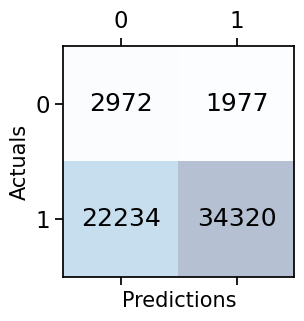


Classification Report:
              precision    recall  f1-score   support

        Fail       0.12      0.60      0.20      4949
     Success       0.95      0.61      0.74     56554

    accuracy                           0.61     61503
   macro avg       0.53      0.60      0.47     61503
weighted avg       0.88      0.61      0.70     61503



In [ ]:
# Base learner with class weights
base_estimator = DecisionTreeClassifier(class_weight='balanced', max_depth=1)  # Shallow trees for AdaBoost

# Initialize AdaBoost with the base learner
ada = AdaBoostClassifier(estimator=base_estimator, algorithm='SAMME.R', learning_rate = 1.0, n_estimators=200, random_state=42)
# Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}

ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(accuracy)
print(precision)
print(recall)
print('-----------------')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
# plt.title('Confusion Matrix', fontsize=15)
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fail', 'Success']))


In [ ]:
# Predict probabilities for the test set
y_pred_proba = ada.predict_proba(X_test)[:, 1]  # Assuming 'success' is the second class


In [ ]:
np.median(y_pred_proba)

0.5001449637711197

In [ ]:
np.max(y_pred_proba)

0.5452126619543891

# Logistic Regression

0.4810334455229826
0.9360971464986193
0.467535452841532
-----------------


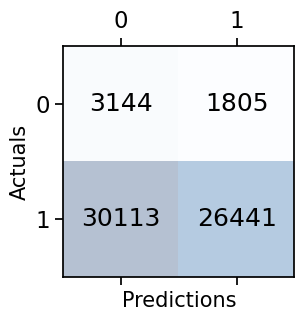


Classification Report:
              precision    recall  f1-score   support

        Fail       0.09      0.64      0.16      4949
     Success       0.94      0.47      0.62     56554

    accuracy                           0.48     61503
   macro avg       0.52      0.55      0.39     61503
weighted avg       0.87      0.48      0.59     61503



In [ ]:
# Create Logistic Regression model
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=200, C=0.01, penalty='l1', solver='liblinear')
# Best Parameters: {'C': 0.01, 'l1_ratio': 0.9, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
# , l1_ratio=0.9 - # Only applicable for 'elasticnet'

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(accuracy)
print(precision)
print(recall)
print('-----------------')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
# plt.title('Confusion Matrix', fontsize=15)
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fail', 'Success']))


# Random Forest

0.49056143602751084
0.93498206401766
0.4793118081833292
-----------------


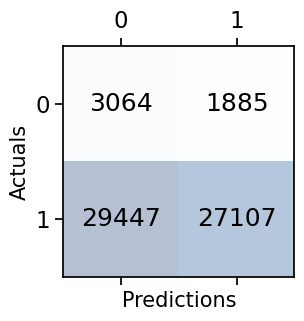


Classification Report:
              precision    recall  f1-score   support

        Fail       0.09      0.62      0.16      4949
     Success       0.93      0.48      0.63     56554

    accuracy                           0.49     61503
   macro avg       0.51      0.55      0.40     61503
weighted avg       0.87      0.49      0.60     61503



In [ ]:
rf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth = 3, min_samples_split = 4, n_estimators = 150, random_state=42)
# 1. Best parameters: {'criterion': 'gini', 'n_estimators': 150}
# 2. Best parameters: {'criterion': 'entropy', 'min_samples_split': 3}
# 3. Best parameters: {'criterion': 'entropy', 'min_samples_split': 4}

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(accuracy)
print(precision)
print(recall)
print('-----------------')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
# plt.title('Confusion Matrix', fontsize=15)
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fail', 'Success']))

# Gradient boosting

0.9195161211648212
0.919531072160255
0.9999823177847721
-----------------


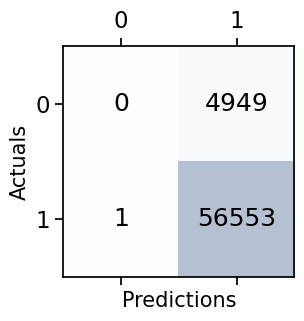


Classification Report:
              precision    recall  f1-score   support

        Fail       0.00      0.00      0.00      4949
     Success       0.92      1.00      0.96     56554

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



In [ ]:
gb = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate	= 0.5, loss = 'exponential', n_estimators = 50)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(accuracy)
print(precision)
print(recall)
print('-----------------')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
# plt.title('Confusion Matrix', fontsize=15)
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fail', 'Success']))

# Classification

In [ ]:
# Initialize classifiers
classifiers = {
    "Decision Tree":        DecisionTreeClassifier(class_weight='balanced'),
    "Logistic Regression":  LogisticRegression(class_weight='balanced', random_state=42, max_iter=200, C=0.01, penalty='l1', solver='liblinear'),
    "Random Forest":        RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth = 3, min_samples_split = 4, n_estimators = 150, random_state=42),
    "AdaBoost":             AdaBoostClassifier(estimator=base_estimator, algorithm='SAMME.R', learning_rate = 1.0, n_estimators=200, random_state=42)
    }

0.8438124969513682
0.9224982001439885
0.9062842592920041
-----------------


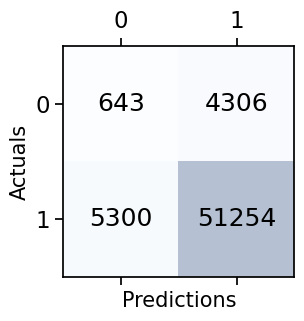


Classification Report:
              precision    recall  f1-score   support

        Fail       0.11      0.13      0.12      4949
     Success       0.92      0.91      0.91     56554

    accuracy                           0.84     61503
   macro avg       0.52      0.52      0.52     61503
weighted avg       0.86      0.84      0.85     61503

-----------------
-----------------

0.5593710875892233
0.9446826499184733
0.5532057856208226
-----------------


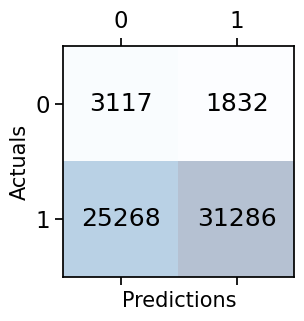


Classification Report:
              precision    recall  f1-score   support

        Fail       0.11      0.63      0.19      4949
     Success       0.94      0.55      0.70     56554

    accuracy                           0.56     61503
   macro avg       0.53      0.59      0.44     61503
weighted avg       0.88      0.56      0.66     61503

-----------------
-----------------

0.5093247483862576
0.9452998379254457
0.49503129752095343
-----------------


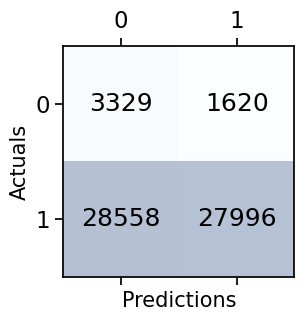


Classification Report:
              precision    recall  f1-score   support

        Fail       0.10      0.67      0.18      4949
     Success       0.95      0.50      0.65     56554

    accuracy                           0.51     61503
   macro avg       0.52      0.58      0.42     61503
weighted avg       0.88      0.51      0.61     61503

-----------------
-----------------

0.6063444059639367
0.9455326886519547
0.6068536266223432
-----------------


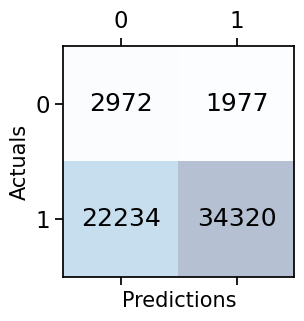


Classification Report:
              precision    recall  f1-score   support

        Fail       0.12      0.60      0.20      4949
     Success       0.95      0.61      0.74     56554

    accuracy                           0.61     61503
   macro avg       0.53      0.60      0.47     61503
weighted avg       0.88      0.61      0.70     61503

-----------------
-----------------



In [ ]:
results = []

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    report = classification_report(y_test, y_pred, target_names=['Fail', 'Success'])

    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Classification Report": report,
        "FPR": fpr,
        "TPR": tpr,
        "AUC": roc_auc
    })

    print(accuracy)
    print(precision)
    print(recall)
    print('-----------------')

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

    plt.xlabel('Predictions', fontsize=15)
    plt.ylabel('Actuals', fontsize=15)
    # plt.title('Confusion Matrix', fontsize=15)
    plt.show()

    # Classification report
    print("\nClassification Report:")
    print(report)
    print('-----------------')
    print('-----------------')
    print('')

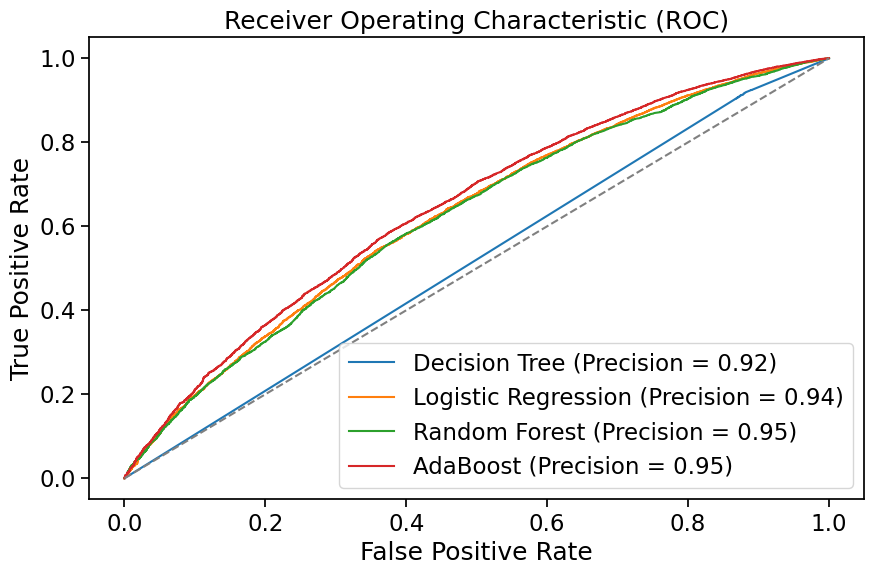

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
for result in results:
    plt.plot(result['FPR'], result['TPR'], label=f"{result['Classifier']} (Precision = {result['Precision']:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Grid Search

In [ ]:
base_estimator = DecisionTreeClassifier(class_weight='balanced', max_depth=1)  # Shallow trees for AdaBoost

adaboost_classifier = AdaBoostClassifier(estimator=base_estimator)

# parameter_grid = {'n_estimators': [100, 150, 200],
#                   'algorithm': ['SAMME', 'SAMME.R'],
#                   'learning_rate':	[0.1, 0.5, 1.0]}

parameter_grid = {'n_estimators': [10, 50, 100, 150, 200],
                  'algorithm': ['SAMME', 'SAMME.R'],
                  'learning_rate':	[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]}

# Set up GridSearchCV
grid_search = GridSearchCV(adaboost_classifier, parameter_grid, scoring='precision')

# Perform the grid search
grid_search.fit(X_train, y_train)

# pruvezne ukazovani vysledku
pd.DataFrame(grid_search.cv_results_)


# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
Best Score: 0.9459780209012163
[[ 2972  1977]
 [22234 34320]]
              precision    recall  f1-score   support

           0       0.12      0.60      0.20      4949
           1       0.95      0.61      0.74     56554

    accuracy                           0.61     61503
   macro avg       0.53      0.60      0.47     61503
weighted avg       0.88      0.61      0.70     61503



In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.174338,0.003934,0.000000,0.000000,SAMME,0.1,10,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
1,0.228258,0.040944,0.000000,0.000000,SAMME,0.1,50,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
2,0.260542,0.014889,0.000000,0.000000,SAMME,0.1,100,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
3,0.259081,0.005322,0.000000,0.000000,SAMME,0.1,150,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
4,0.197662,0.042160,0.000000,0.000000,SAMME,0.1,200,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
5,0.167117,0.004132,0.000000,0.000000,SAMME,0.25,10,"{'algorithm': 'SAMME', 'learning_rate': 0.25, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
6,0.173498,0.005888,0.000000,0.000000,SAMME,0.25,50,"{'algorithm': 'SAMME', 'learning_rate': 0.25, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
7,0.168355,0.004373,0.000000,0.000000,SAMME,0.25,100,"{'algorithm': 'SAMME', 'learning_rate': 0.25, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
8,0.170618,0.003336,0.000000,0.000000,SAMME,0.25,150,"{'algorithm': 'SAMME', 'learning_rate': 0.25, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
9,0.166592,0.004550,0.000000,0.000000,SAMME,0.25,200,"{'algorithm': 'SAMME', 'learning_rate': 0.25, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31


In [ ]:
pd.DataFrame(grid_search.cv_results_).shape

(60, 16)